I am using this to test out hte PhysSignal (PhysSignalZeroOffset)
functionality of eeghdf

we can then look at some of the statistics of the waveforms as well
-Chris
2018-05-07

In [1]:
%matplotlib inline

In [2]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (16,9)

In [3]:
import eegvis
import eegvis.stackplot_bokeh as sbplot
import eegvis.stacklineplot as splot
import eegvis.montageview

In [4]:
import eeghdf


In [5]:
ls ../data

absence_epilepsy.eeghdf*   tuh_00000115_s07_a00_f200.eeg.h5
spasms.eeghdf*             tuh_00000115_s07_a01.edf*
tuh_00000115_s07_a00.edf*  tuh_00000115_s07_a02.edf*


In [6]:
testfile = '../data/tuh_00000115_s07_a00_f200.eeg.h5'
testfile2 = '../data/absence_epilepsy.eeghdf'
testfile3 = '../data/spasms.eeghdf'
# hf = h5py.File(testfile, 'r')
eegf = eeghdf.Eeghdf_ver2(testfile)
hf = eegf.hdf
eegf2 = eeghdf.Eeghdf(testfile2)
eegf3 = eeghdf.Eeghdf(testfile3)

### The Physical Signals interface (phys_signals)
For convenience, Eeghdf objects offer a phys_signal interface which will automatically scale the sampled data to represents as physical signals such as micro volts (uV) or millivolts (mV) as described int the dimensional labels. 

Most of the numpy indexing options will work as a 2 dimensional array with shape (number_of_channels, sample_number)

In [8]:
phys_signals2 = eegf2.phys_signals

In [9]:
elabels = eegf.electrode_labels

In [10]:
phys_signals2

### Verifying the scaling of the signals
On our Nihon-Koden amplifiers, it is standard to begin the recording with a 50 uV square wave signal. From wht I can tell, it looks like a 50uV positive square wave.

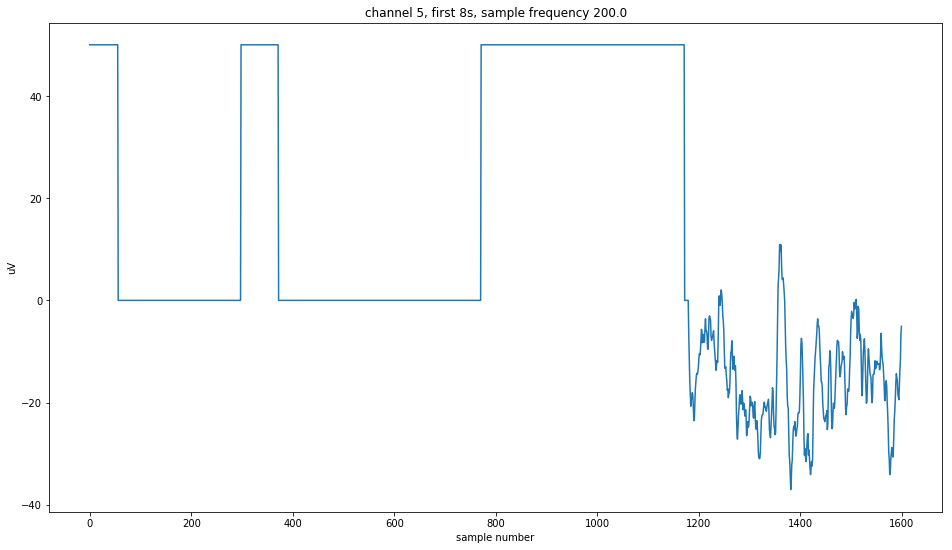

In [11]:

plt.plot(phys_signals2[5,0:int(8*eegf2.sample_frequency)])
plt.title('channel 5, first 8s, sample frequency %s' %eegf2.sample_frequency)
plt.xlabel('sample number')
plt.ylabel('uV')
plt.show()

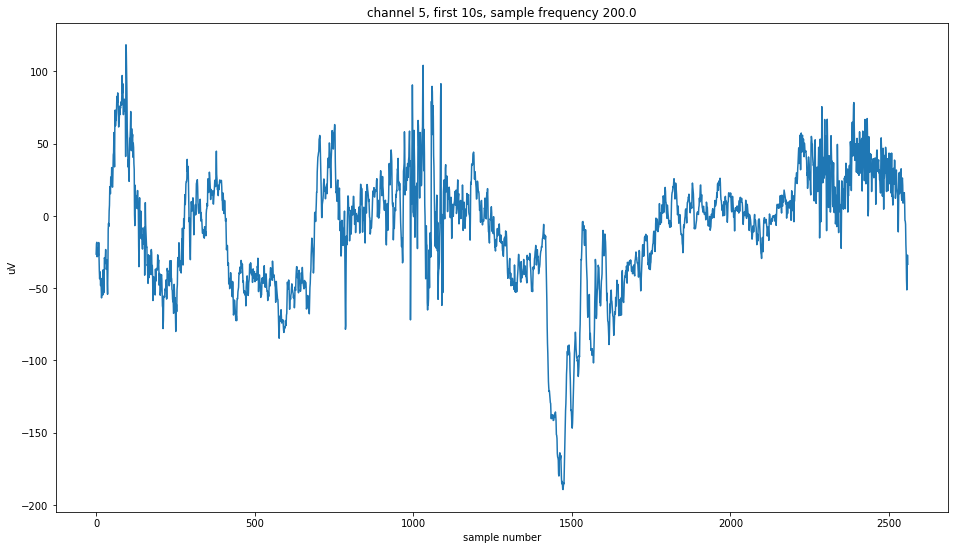

In [12]:
ch=10; width=10; start = 120
fs = eegf.sample_frequency
plt.plot(eegf.phys_signals[ch,int(start*fs):int(fs*(start+width))])
plt.title('channel 5, first %ss, sample frequency %s' %(width, eegf2.sample_frequency))
plt.xlabel('sample number')
plt.ylabel('uV')
plt.show()

### check out fancy indexing
you can use lists or tuples to index into the object, I do not yet support using a numpy array.

In [14]:
subset = phys_signals2[1:2, 300:310]
subset

array([[ 49.99999731,  49.99999731,  49.99999731,  49.99999731,
         49.99999731,  49.99999731,  49.99999731,  49.99999731,
         49.99999731,  49.99999731]])

In [17]:
select = [4,8]
subset = phys_signals2[select, 6000:6005]
subset

array([[  18.06640528,   19.04296773,   21.97265507,   26.17187359,
          26.17187359],
       [-239.55076838, -239.74608087, -239.45311214, -237.10936226,
        -240.03904961]])

In [21]:
# tryout array to do the same thing, not hard to add
selarr = np.array(select)
ps = phys_signals2[:,:]
subset_orig = ps[selarr, 6000:6005]
assert np.all(subset_orig == subset)
subset_arr = phys_signals2[selarr, 6000:6005]

Exception: oops unhandled case in __getitem__

In [ ]:
import scipy.stats

In [35]:
print('%s channel' % eegf.electrode_labels[ch])
print(scipy.stats.describe(eegf.phys_signals[ch,:]))

EEG F7 channel
DescribeResult(nobs=76800, minmax=(-2808.8193545945614, 1996.1891660512099), mean=-0.523206758157026, variance=6663.2287242862731, skewness=-3.877654537551473, kurtosis=180.6142974906021)


In [36]:
print('%s channel' % eegf2.electrode_labels[ch])
print(scipy.stats.describe(eegf2.phys_signals[ch,:]))

EEG F7 channel
DescribeResult(nobs=362200, minmax=(-553.12497029068436, 375.19529234760051), mean=-25.973182500658694, variance=3889.8453759132067, skewness=-0.7382572086318947, kurtosis=6.321895469357001)


In [22]:
#  F7 - <F7> = zeroMeanF7
# 
eegf._s2u

array([ 0.16731114,  0.16731114,  0.16731114,  0.16731114,  0.16731114,
        0.16731114,  0.16731114,  0.16731114,  0.16731114,  0.16731114,
        0.16731114,  0.16731114,  0.16731114,  0.16731114,  0.16731114,
        0.16731114,  0.16731114,  0.16731114,  0.16731114,  0.16731114,
        0.16731114,  0.16731114,  0.16731114,  0.16731114,  0.16731114,
        0.16731114,  0.16731114,  0.16731114,  0.16731114,  0.16731114])

In [24]:
6663/3889

1.7132939058884031

In [23]:
eegf2._s2u

array([  9.76562448e-02,   9.76562448e-02,   9.76562448e-02,
         9.76562448e-02,   9.76562448e-02,   9.76562448e-02,
         9.76562448e-02,   9.76562448e-02,   9.76562448e-02,
         9.76562448e-02,   9.76562448e-02,   9.76562448e-02,
         9.76562448e-02,   9.76562448e-02,   9.76562448e-02,
         9.76562448e-02,   9.76562448e-02,   9.76562448e-02,
         9.76562448e-02,   9.76562448e-02,   9.76562448e-02,
         9.76562448e-02,   9.76562448e-02,   9.76562448e-02,
         9.76562448e-02,   9.76562448e-02,   9.76562448e-02,
         9.76562448e-02,   9.76562448e-02,   9.76562448e-02,
         9.76562448e-02,   9.76562448e-02,   9.76562448e-02,
         3.66299840e-01,   3.66299840e-01,   3.05180438e-05])

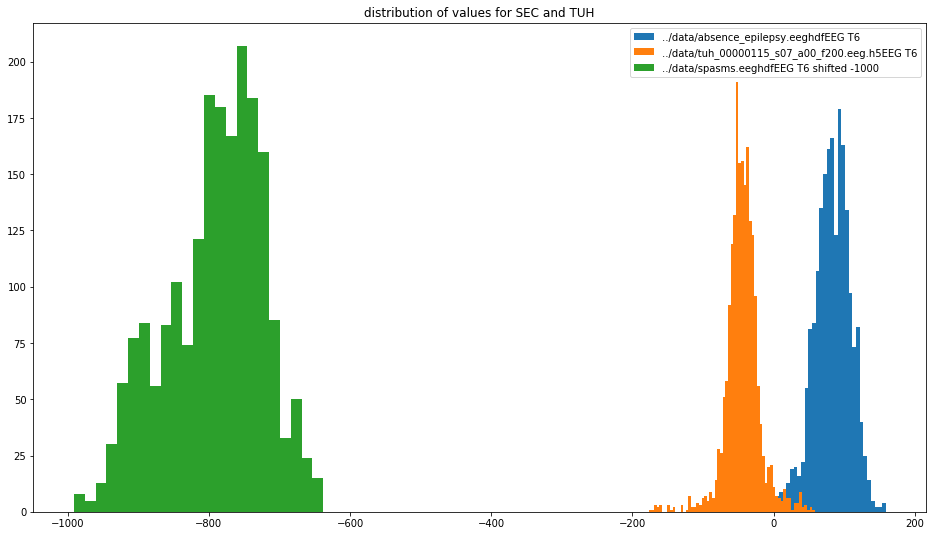

In [33]:
#np.histogram(eegf2.phys_signals[ch,:],bins='auto')
ch=15
plt.hist(eegf2.phys_signals[ch,4000:6000],bins='auto', label=eegf2.file_name+eegf2.electrode_labels[ch])
plt.hist(eegf.phys_signals[ch,4000:6000],bins='auto', label=eegf.file_name+eegf.electrode_labels[ch])
plt.hist(eegf3.phys_signals[ch,4000:6000]-1000,bins='auto', label=eegf3.file_name+eegf3.electrode_labels[ch]+' shifted -1000')
plt.legend()
plt.title('distribution of values for SEC and TUH')
plt.show()

$ varall = \sum_{i in dataset} \sum_{j \in channels of study_i} var(s_{ij})/N_i $ 

In [57]:
print('ages:', eegf.age_years, 
eegf2.age_years,
eegf3.age_years)

ages: 0.0 10.0503363141 0.459058092339


In [18]:
eegf2._s2u

array([  9.76562448e-02,   9.76562448e-02,   9.76562448e-02,
         9.76562448e-02,   9.76562448e-02,   9.76562448e-02,
         9.76562448e-02,   9.76562448e-02,   9.76562448e-02,
         9.76562448e-02,   9.76562448e-02,   9.76562448e-02,
         9.76562448e-02,   9.76562448e-02,   9.76562448e-02,
         9.76562448e-02,   9.76562448e-02,   9.76562448e-02,
         9.76562448e-02,   9.76562448e-02,   9.76562448e-02,
         9.76562448e-02,   9.76562448e-02,   9.76562448e-02,
         9.76562448e-02,   9.76562448e-02,   9.76562448e-02,
         9.76562448e-02,   9.76562448e-02,   9.76562448e-02,
         9.76562448e-02,   9.76562448e-02,   9.76562448e-02,
         3.66299840e-01,   3.66299840e-01,   3.05180438e-05])

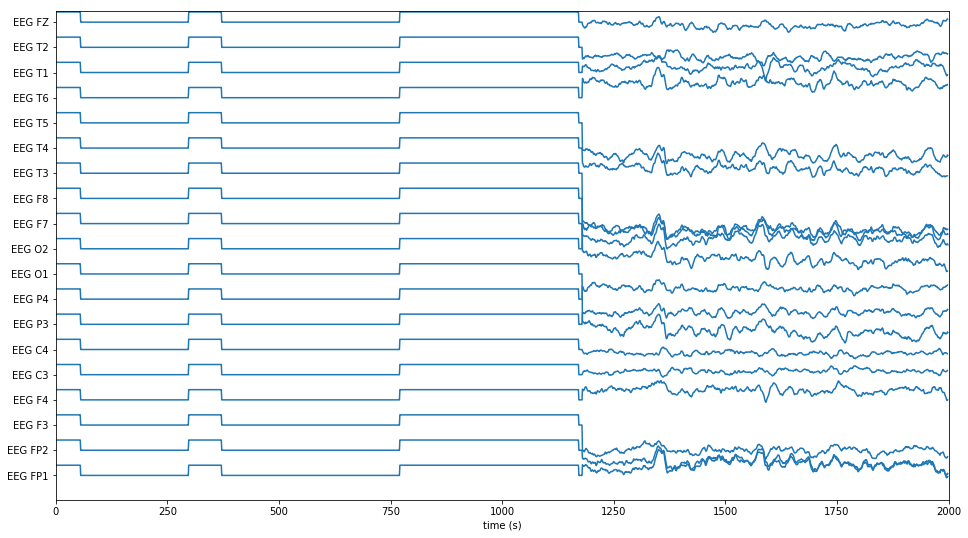

In [31]:
splot.stackplot(phys_signals[0:19:,0:2000], ylabels=elabels, yscale=3.0)

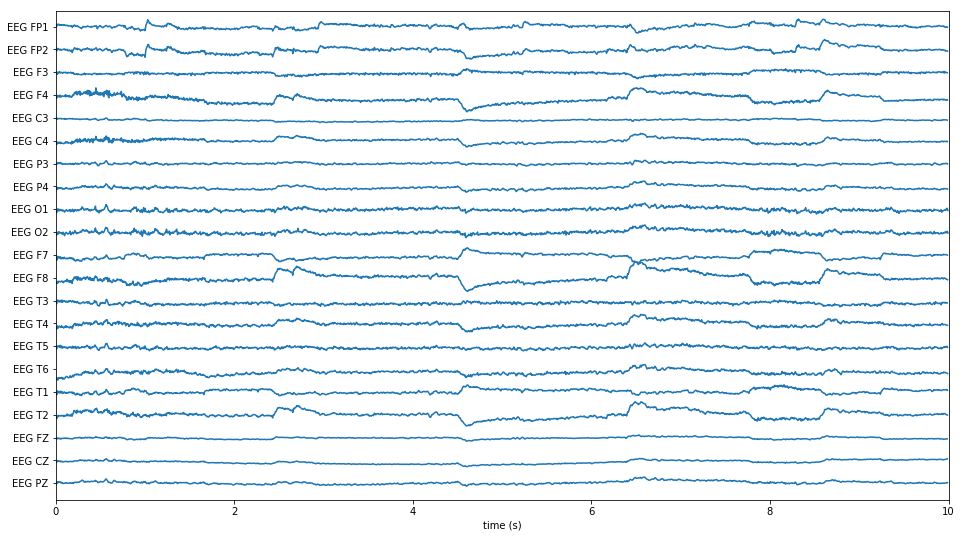

In [15]:
splot.show_epoch_centered(phys_signals, goto_sec=5, epoch_width_sec=10, chstart=0, chstop=21, fs=200, ylabels=elabels)

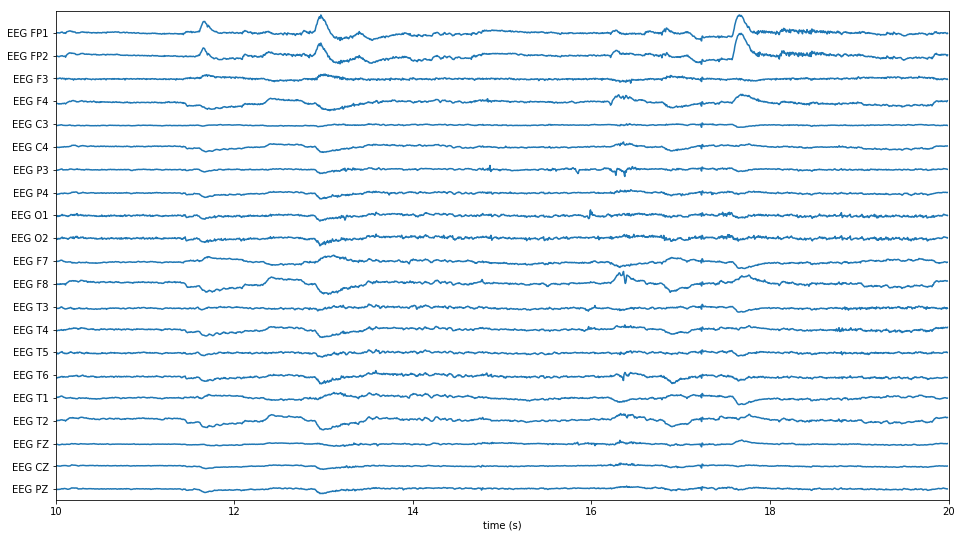

In [16]:
splot.show_epoch_centered(phys_signals, goto_sec=15, epoch_width_sec=10, chstart=0, chstop=21, fs=200, ylabels=elabels)

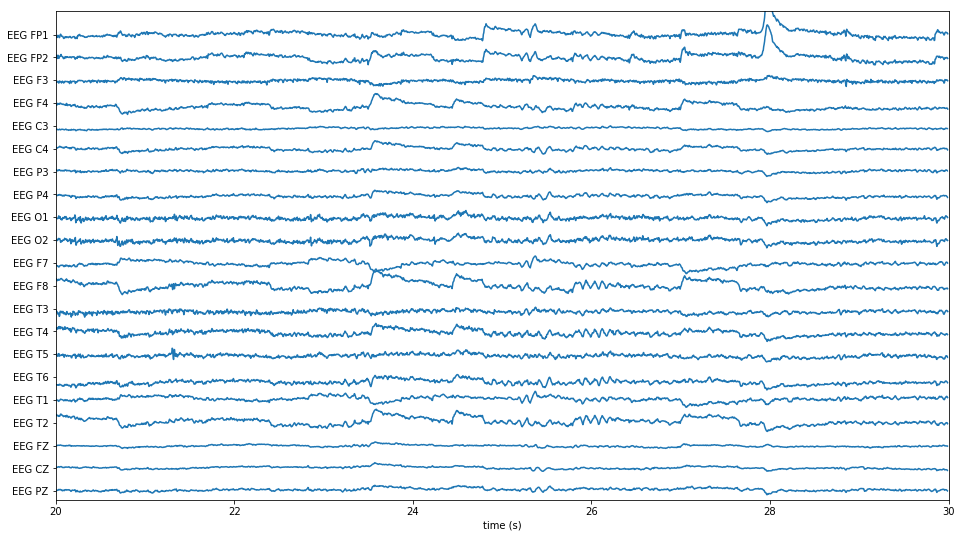

In [17]:
splot.show_epoch_centered(phys_signals, goto_sec=25, epoch_width_sec=10, chstart=0, chstop=21, fs=200, ylabels=elabels, yscale=1.5)

In [18]:
eegvis.montageview.DB_LABELS

['Fp1-F7',
 'F7-T3',
 'T3-T5',
 'T5-O1',
 'Fp2-F8',
 'F8-T4',
 'T4-T6',
 'T6-O2',
 'Fp1-F3',
 'F3-C3',
 'C3-P3',
 'P3-O1',
 'Fp2-F4',
 'F4-C4',
 'C4-P4',
 'P4-O2',
 'Fz-Cz',
 'Cz-Pz']

In [19]:
elabels

['EEG FP1',
 'EEG FP2',
 'EEG F3',
 'EEG F4',
 'EEG C3',
 'EEG C4',
 'EEG P3',
 'EEG P4',
 'EEG O1',
 'EEG O2',
 'EEG F7',
 'EEG F8',
 'EEG T3',
 'EEG T4',
 'EEG T5',
 'EEG T6',
 'EEG T1',
 'EEG T2',
 'EEG FZ',
 'EEG CZ',
 'EEG PZ',
 'EEG EKG1',
 'EEG C3P',
 'EEG C4P',
 'EEG SP1',
 'EEG SP2',
 'EEG A1',
 'EEG A2',
 'EEG 31',
 'EEG 32']

In [20]:
rlabels = eegvis.montageview.standard2shortname(elabels)
rlabels

['FP1',
 'FP2',
 'F3',
 'F4',
 'C3',
 'C4',
 'P3',
 'P4',
 'O1',
 'O2',
 'F7',
 'F8',
 'T3',
 'T4',
 'T5',
 'T6',
 'T1',
 'T2',
 'FZ',
 'CZ',
 'PZ',
 'EKG1',
 'C3P',
 'C4P',
 'SP1',
 'SP2',
 'A1',
 'A2',
 '31',
 '32']

In [21]:
# make standard, wonder if I should make all uppercase?
# FP1 -> Fp1, FP2 -> Fp2, CZ -> Cz necessary to for double banana
replacement_dict = {
    'FP1':'Fp1',
    'FP2':'Fp2',
    'CZ' : 'Cz',
    'PZ' : 'Pz',
    'FZ' : 'Fz'
}
rlabels = [eegvis.montageview.replace_all(text, replacement_dict) for text in rlabels]


In [22]:
monv = eegvis.montageview.MontageView(eegvis.montageview.DB_LABELS, rlabels)

In [23]:
V = eegvis.montageview.double_banana_set_matrix(monv.V)

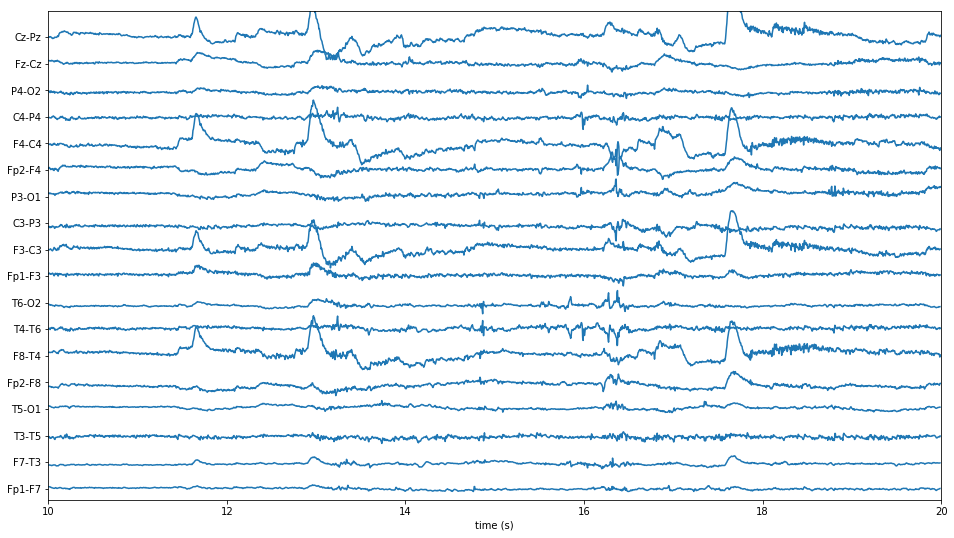

In [25]:
splot.show_montage_centered(phys_signals, monv,15,
                        epoch_width_sec=10,
                        chstart=0, chstop=21, fs=200,
                        ylabels=elabels,yscale=2.0) 

In [26]:
# now reverse for clinical use
monv.V = - monv.V

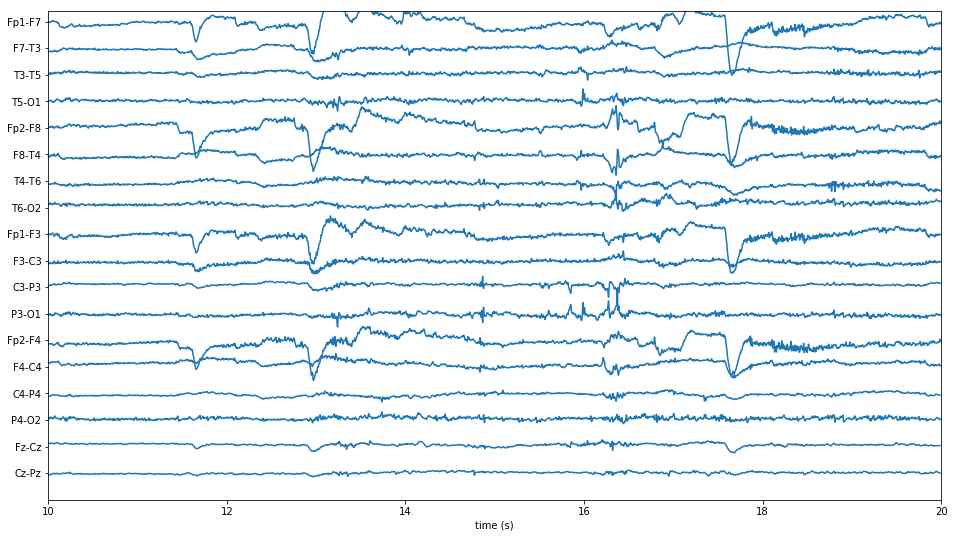

In [32]:
splot.show_montage_centered(phys_signals, monv,15,
                        epoch_width_sec=10,
                        chstart=0, chstop=21, fs=200,
                        ylabels=rlabels,yscale=2.0) 

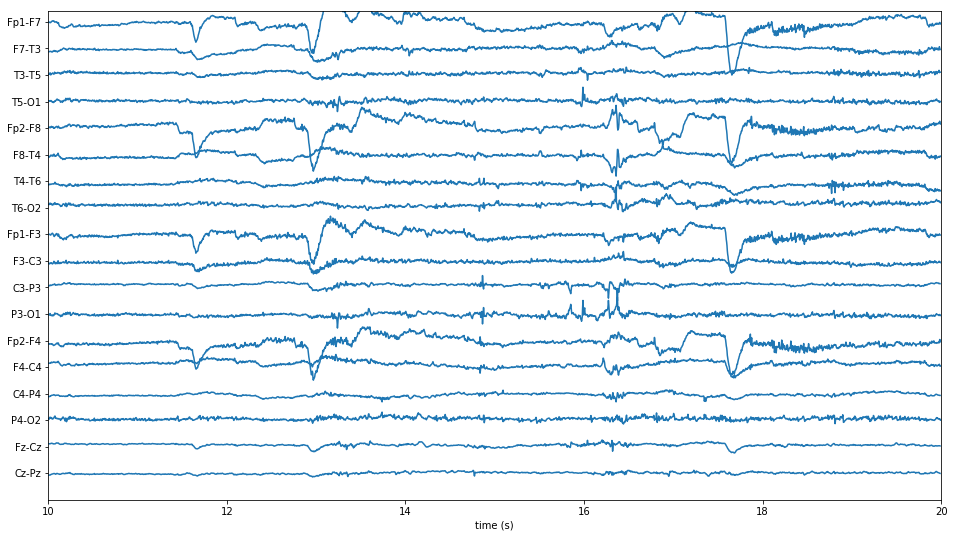

In [34]:
# now let's compare with the original waveform
signals = eegf.rawsignals
splot.show_montage_centered(signals, monv,15,
                        epoch_width_sec=10,
                        chstart=0, chstop=21, fs=eegf.sample_frequency,
                        ylabels=rlabels,yscale=2.0) 

Ok. That looks pretty good
- next need to clean up montage viewing code
- run across all all tuh seizure versions